#### Import Libraries

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

#### Load the dataset

In [12]:
df= pd.read_csv('hw5diabetes.csv')

#### Validating the data in Diabets_01 column if it contains only Binary

In [13]:
print(df['Diabetes_01'].unique())

[0. 1.]


#### Since data is already transformed in diabetes_012 Column, no need to perform any transformation. Filtering data to get features to train the model. In this process, removing the target variables i.e diabetes column to identify features that contributes to identifying the target variable which is diabetes_01

In [14]:
X=df.drop(columns=['Diabetes_012','Diabetes_01'])
y=df['Diabetes_01']

#### Splitting the data into training and testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

#### Initializing the Classifiers

In [16]:
dec_tree_classifier = DecisionTreeClassifier(random_state=30)
bagging_ensemble_classifiers = BaggingClassifier(estimator=dec_tree_classifier, n_estimators=50, random_state=30)
boosting_ensemble_classifier=GradientBoostingClassifier(n_estimators=50, random_state=30)

#### Training the classifiers on the training dataset

In [17]:
dec_tree_classifier.fit(X_train,y_train)
bagging_ensemble_classifiers.fit(X_train,y_train)
boosting_ensemble_classifier.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=50, random_state=30)

In [18]:
#make predictions using X_test as the input
dt_pred = dec_tree_classifier.predict(X_test)
rf_pred = bagging_ensemble_classifiers.predict(X_test)
gb_pred = boosting_ensemble_classifier.predict(X_test)

#### Confusion Matrix comparison

In [24]:
print("Decision Tree confusion matrix:\n", confusion_matrix(y_test, dt_pred))
print("Bagging ensemble confusion matrix:\n", confusion_matrix(y_test, rf_pred))
print("Gradient Boosting confusion matrix:\n",confusion_matrix(y_test, gb_pred)) 

Decision Tree confusion matrix:
 [[55199  9092]
 [ 7769  4044]]
Bagging ensemble confusion matrix:
 [[60769  3522]
 [ 8930  2883]]
Gradient Boosting confusion matrix:
 [[62791  1500]
 [ 9720  2093]]


#### Performance metrics

In [25]:
#Decision Tree performance metrics
print("Decision Tree's Accuracy: ", accuracy_score(y_test, dt_pred))
print("Decision Tree's precision score: ", precision_score(y_test, dt_pred))
print("Decision Tree's recall:", recall_score(y_test, dt_pred))
print("Decsision Tree's f1_score:", f1_score(y_test, dt_pred))
cm = confusion_matrix(y_test, dt_pred)
print("Decision Tree's True Negative Rate:", cm[0, 0] / (cm[0, 0] + cm[0, 1]))

Decision Tree's Accuracy:  0.7784479133816882
Decision Tree's precision score:  0.30785627283800243
Decision Tree's recall: 0.3423347159908575
Decsision Tree's f1_score: 0.32418132991302256
Decision Tree's True Negative Rate: 0.8585805167130702


In [28]:
#Bagging Ensemble performance metrics
print("Bagging ensemble's Accuracy:", accuracy_score(y_test, rf_pred))
print("Bagging ensemblet's precision score:", precision_score(y_test, rf_pred))
print("Bagging ensemble's recall:", recall_score(y_test, rf_pred))
print("Bagging ensemble's f1_score:",f1_score(y_test,rf_pred))
cm = confusion_matrix(y_test, rf_pred)
print("Bagging ensemble's True Negative Rate:", cm[0, 0] / (cm[0, 0] + cm[0, 1]))

Bagging ensemble's Accuracy: 0.8363817933354357
Bagging ensemblet's precision score: 0.45011709601873534
Bagging ensemble's recall: 0.24405316177093034
Bagging ensemble's f1_score: 0.31650016467230213
Bagging ensemble's True Negative Rate: 0.9452178376444603


In [29]:
#Gradient Boost performance metrics
print("Gradient Boost's Accuracy:", accuracy_score(y_test, gb_pred))
print("Gradient Boost's precision score:", precision_score(y_test, gb_pred))
print("Gradient Boost's recall:", recall_score(y_test, gb_pred))
print("Gradient Boost's f1_score:",f1_score(y_test,gb_pred))
cm = confusion_matrix(y_test, gb_pred)
print("Gradient Boost's True Negative Rate:", cm[0, 0] / (cm[0, 0] + cm[0, 1]))

Gradient Boost's Accuracy: 0.8525701671397036
Gradient Boost's precision score: 0.5825215697188979
Gradient Boost's recall: 0.1771776856006095
Gradient Boost's f1_score: 0.27171231987537325
Gradient Boost's True Negative Rate: 0.9766685850274534


In [31]:
dt_probs = dec_tree_classifier.predict_proba(X_test)[:, 1]
rf_probs = bagging_ensemble_classifiers.predict_proba(X_test)[:, 1]
gb_probs = boosting_ensemble_classifier.predict_proba(X_test)[:, 1]

#### Compute ROC Curve and AUC for each Classifier

In [35]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_probs)

In [36]:
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_gb = auc(fpr_gb, tpr_gb)

#### Plot the ROC AUC Curves

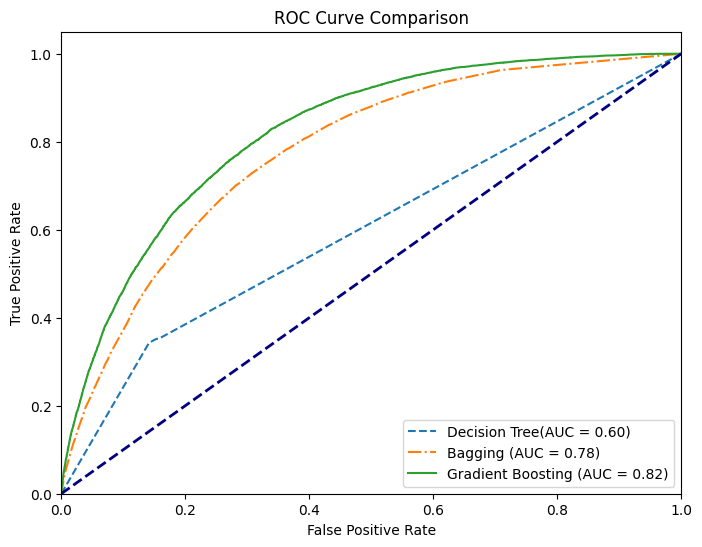

In [37]:
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label = f'Decision Tree(AUC = {auc_dt:.2f})', linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f'Bagging (AUC = {auc_rf:.2f})', linestyle='-.')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})', linestyle='-')

#Diagonal line for reference (random model)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc= "lower right")